<a href="https://colab.research.google.com/github/Poojanala20/house-price-prediction/blob/main/_ipkl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Cleaned_data_for_model.csv")

# Check the first few rows
data.head()


,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [ ]:
print("Data variable exists") if 'data' in locals() else print("Data is undefined")
print(data.columns)



Data variable exists
Index(['Unnamed: 0', 'property_type', 'price', 'location', 'city', 'baths',
       'purpose', 'bedrooms', 'Area_in_Marla'],
      dtype='object')


In [ ]:
# Basic info about dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [ ]:
# Check missing values
print(data.isnull().sum())
# Get summary statistics
data.describe()


Unnamed: 0       0
property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64


,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


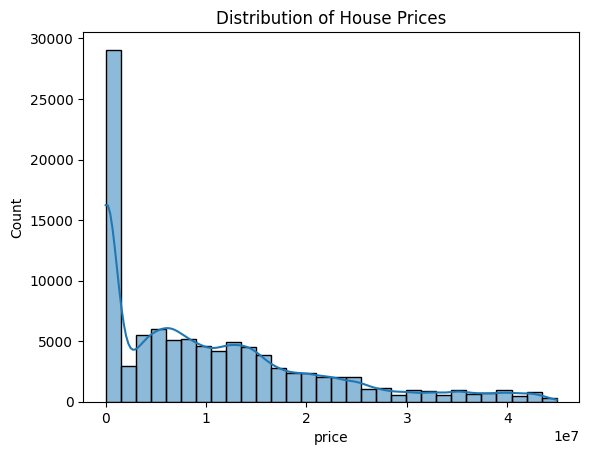

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


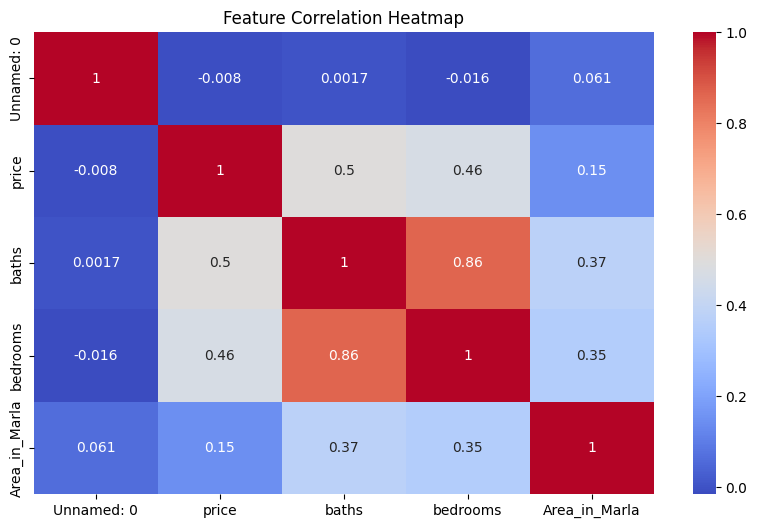

In [ ]:
plt.figure(figsize=(10,6))

# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Convert categorical columns into numerical values
data_encoded = pd.get_dummies(data, columns=['property_type', 'location', 'city', 'purpose'], drop_first=True)

# Check the new dataset
print(data_encoded.head())


   Unnamed: 0     price  baths  bedrooms  Area_in_Marla  property_type_Flat  \
0           0  10000000      2         2            4.0                True   
1           1   6900000      3         3            5.6                True   
2           2  16500000      6         5            8.0               False   
3           3  43500000      4         4           40.0               False   
4           4   7000000      3         3            8.0               False   

   property_type_House  property_type_Lower Portion  property_type_Penthouse  \
0                False                        False                    False   
1                False                        False                    False   
2                 True                        False                    False   
3                 True                        False                    False   
4                 True                        False                    False   

   property_type_Room  ...  location_Zone 5 

In [ ]:
from sklearn.model_selection import train_test_split

# Drop index column
data_encoded = data_encoded.drop(columns=["Unnamed: 0"], axis=1)

# Split features and target
X = data_encoded.drop(columns=["price"])
y = data_encoded["price"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((79599, 1402), (19900, 1402), (79599,), (19900,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42, max_depth=10)



# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")


Random Forest - MAE: 2216770.79309005
Random Forest - MSE: 14634609154466.164
Random Forest - RMSE: 3825520.769054347
Random Forest - R² Score: 0.8721428925599112


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(model)


LinearRegression()


In [ ]:
from google.colab import files
files.download("house_price_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>